In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
car=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
car   

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

In [4]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
print(car.Seller_Type.value_counts())
print(car.Car_Name.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64


In [10]:
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

car.replace({'Seller_Type':{'Dealer':0,'Individual':1,}},inplace=True)

In [11]:
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [12]:
x=car.drop(['Car_Name','Selling_Price'],axis=1)
y=car['Selling_Price']

In [13]:
print(x)
y

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [15]:
lasso_reg_model=Lasso()
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [16]:
trainingdataprediction=lasso_reg_model.predict(x_train)

In [17]:
# R Squered Error

error_score=metrics.r2_score(y_train,trainingdataprediction)
error_score

0.8427856123435794

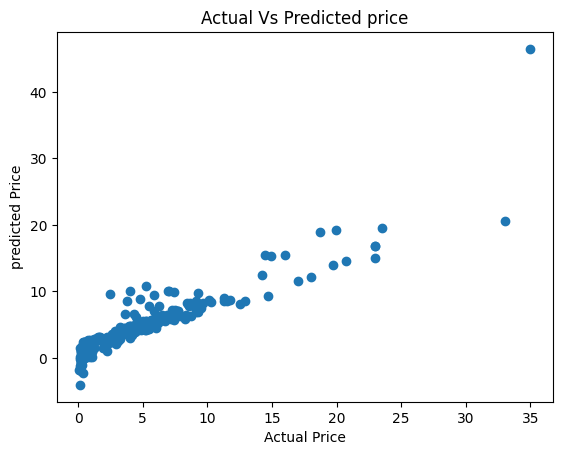

In [18]:
plt.scatter(y_train,trainingdataprediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Vs Predicted price')
plt.show()

In [19]:
testdataprediction=lasso_reg_model.predict(x_test)

In [20]:
test_error_score=metrics.r2_score(y_test,testdataprediction)
test_error_score

0.8709167941173195

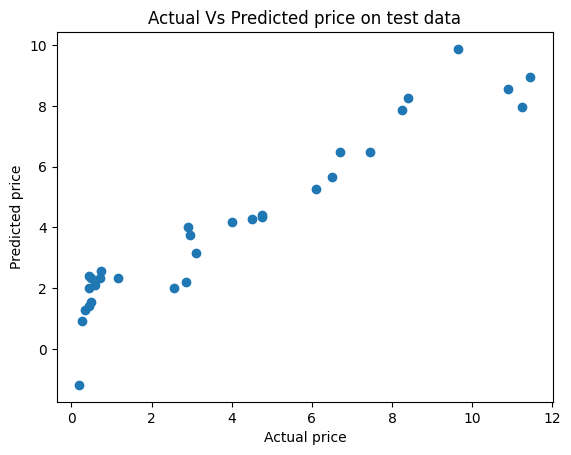

In [21]:
plt.scatter(y_test,testdataprediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Vs Predicted price on test data')
plt.show()

In [22]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

In [23]:
trainingdataprediction=lin_reg_model.predict(x_train)

In [24]:
# R Squered Error

error_score=metrics.r2_score(y_train,trainingdataprediction)
error_score

0.8799451660493711

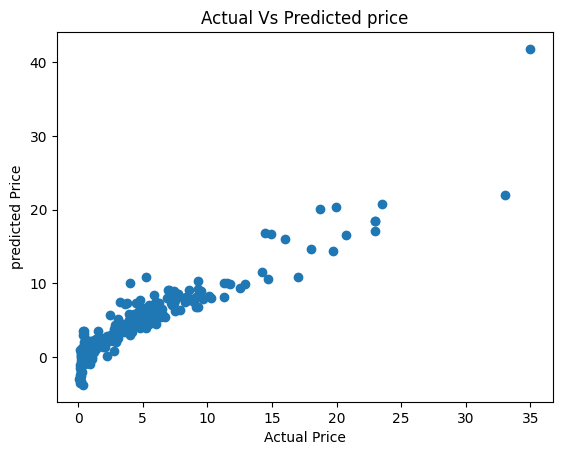

In [25]:
plt.scatter(y_train,trainingdataprediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted Price')
plt.title('Actual Vs Predicted price')
plt.show()

In [26]:
testdataprediction=lin_reg_model.predict(x_test)

In [27]:
test_error_score=metrics.r2_score(y_test,testdataprediction)
test_error_score

0.8365766715027051

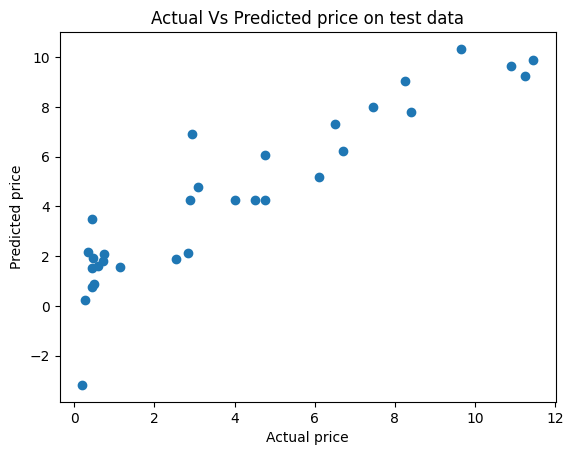

In [28]:
plt.scatter(y_test,testdataprediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Vs Predicted price on test data')
plt.show()

In [29]:
a=[[2020,18,30000,0,1,0,0]]
lin_reg_model.predict(a)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.71582567])